# Basic Health Areas in Madrid
> Now being used to impose restrictions due to Covid19 on people's movement and activities.

- toc: true 
- badges: true
- comments: true
- categories: [Madrid, Covid19]


Since Monday, 21 September 2020 basic health zones have been used in Madrid to impose restrictions on the population in the fight against Covid19. This came as a surprise to the local population - they knew the name of their zone from the name of their health centre but had no idea about what area is served by the health centre.

In this series of block posts I would like to explore the public data on the second wave of Covid19 infections in Madrid using Jupyter notebooks that run on [Google Colab](https://colab.research.google.com) and non-proprietory software. **You too can access the data, run these notebooks and explore the data yourself.**

If you are interested graphical analysis of the Covid19 crisis, I recommend the work of [Kiko Llaneras](https://twitter.com/kikollan) and the team at [El País](https://elpais.com/).

This introductory notebook locates polygon data for these basic health zones and the detailed maps showing the area each zone serves.


In [80]:
#hide
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


Libraries to install and import:

In [98]:
#collapse-hide
!pip install geopandas
!apt-get install poppler-utils 
!pip install pdf2image

import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (PDFInfoNotInstalledError,PDFPageCountError,PDFSyntaxError)
from PIL import Image

## Introduction to 'Zonas Básicas de Salud' in the 'Comunidad de Madrid'



### The Comunidad de Madrid provides polygon data of the basic health zones as 'shape' files.

These can be read using `geopandas`.

División territorial en zonas básicas de salud de la Comunidad de Madrid

https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_zonas_basicas_salud/resource/f1837bd3-a835-4110-9bbf-fae06c99b56b


In [82]:
df=geopandas.read_file('./maps/zonas_basicas_salud.shp')
df.head()

codigo_geo  ...                                           geometry
0        001  ...  POLYGON ((439068.758 4470731.661, 439076.433 4...
1        002  ...  POLYGON ((439924.930 4472798.281, 439928.742 4...
2        003  ...  POLYGON ((443455.718 4472836.724, 443412.985 4...
3        004  ...  POLYGON ((440659.754 4473778.401, 440665.227 4...
4        005  ...  POLYGON ((452408.138 4484644.700, 452415.138 4...

[5 rows x 4 columns]

In [83]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   codigo_geo  286 non-null    object  
 1   pob_pad19   286 non-null    int64   
 2   zona_basic  286 non-null    object  
 3   geometry    286 non-null    geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 9.1+ KB


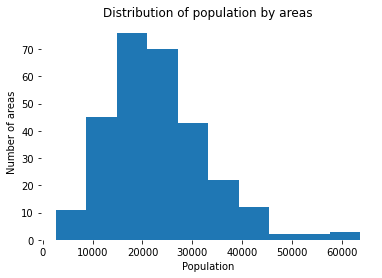

In [84]:
plt.hist(df.pob_pad19)
plt.title('Distribution of population by areas')
plt.ylabel('Number of areas')
plt.box(False)
plt.xlabel('Population');

In [85]:
df.describe()

pob_pad19
count    286.000000
mean   23298.580420
std     9935.956169
min     2636.000000
25%    16702.250000
50%    21829.000000
75%    28164.250000
max    63789.000000

In [86]:
df[df.pob_pad19==df.pob_pad19.min()]

codigo_geo  ...                                           geometry
221        222  ...  POLYGON ((436250.375 4539098.529, 436255.925 4...

[1 rows x 4 columns]

In [87]:
df[df.pob_pad19==df.pob_pad19.max()]

codigo_geo  ...                                           geometry
158        159  ...  POLYGON ((447970.223 4484559.958, 447972.423 4...

[1 rows x 4 columns]

There are 286 basic health zones, with an average population of around 23_000 people: the Rascafría area has only 2_636 people; the Mar Báltico area has 63_789 people.


In [88]:
df["area_sq_km"] = df['geometry'].area/1_000_000
df['pob_densidad_sq_km'] = df.pob_pad19/df.area_sq_km
df.head()

codigo_geo  pob_pad19  ... area_sq_km pob_densidad_sq_km
0        001      30748  ...   1.572304       19556.009302
1        002      19432  ...   0.774111       25102.351889
2        003      29168  ...   0.852828       34201.514571
3        004      21274  ...   0.545204       39020.288131
4        005      29001  ...  35.137286         825.362547

[5 rows x 6 columns]

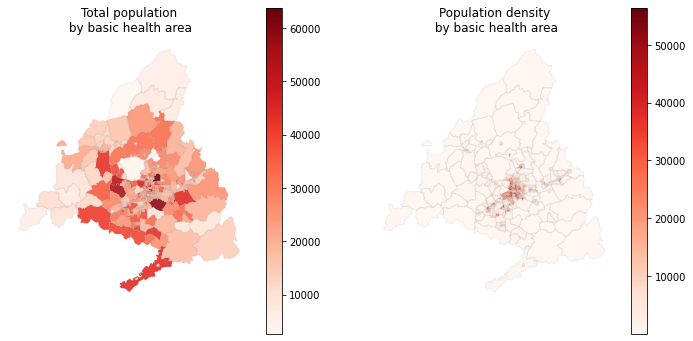

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))

df.plot(ax=ax1, column=df.pob_pad19, cmap='Reds', legend=True)
df.plot(ax=ax1, color='white', edgecolor='grey', alpha=0.1)
ax1.set_title('Total population\n by basic health area')
ax1.axis('off')

df.plot(ax=ax2, column=df.pob_densidad_sq_km, cmap='Reds', legend=True)
df.plot(ax=ax2, color='white', edgecolor='grey', alpha=0.1)
ax2.set_title('Population density\n by basic health area')
ax2.axis('off');

In [90]:
df[df.pob_densidad_sq_km==df.pob_densidad_sq_km.min()]

codigo_geo  pob_pad19  ...  area_sq_km pob_densidad_sq_km
221        222       2636  ...  258.120579          10.212281

[1 rows x 6 columns]

In [91]:
df[df.pob_densidad_sq_km==df.pob_densidad_sq_km.max()]

codigo_geo  pob_pad19  ... area_sq_km pob_densidad_sq_km
160        161      17331  ...   0.307034       56446.431071

[1 rows x 6 columns]

In [97]:
print(f'The Madrid region has an area of {int(df.area.sum()/1000000)} sq km, a population of {df.pob_pad19.sum()} \
and a population density of {int(1000000*df.pob_pad19.sum()/df.area.sum())} people per sq km.')

The Madrid region has an area of 8025 sq km, a population of 6663394 and a population density of 830 people per sq km.


Rascafría has a population density of only 10 people per sq km; Martín de Vargas has a population of 56_446 people per sq km.

### Detailed maps are provided for each zone

- List of zones:

Mapas de Zonas Básicas de Salud del Área Única de la Comunidad de Madrid

https://www.madrid.org/iestadis/fijas/estructu/general/territorio/estructucartemzbs.htm

- Individual maps:

https://www.madrid.org/iestadis/fijas/estructu/general/territorio/descarga/zbs13_mar_baltico.pdf

(maps have been downloaded and stored in `./maps/...`)

Conversion of maps from .pdf to .jpg:

In [93]:
#collapse-hide
convert_from_path('./maps/zbs13_mar_baltico.pdf')[0].resize((1414,1000)).save('./maps/159_mar_baltico.jpg')
convert_from_path('./maps/zbs13_rascafria.pdf')[0].resize((1414,1000)).save('./maps/222_rascafria.jpg')
convert_from_path('./maps/zbs13_martin_de_vargas.pdf')[0].resize((1414,1000)).save('./maps/161_martin_de_vargas.jpg')

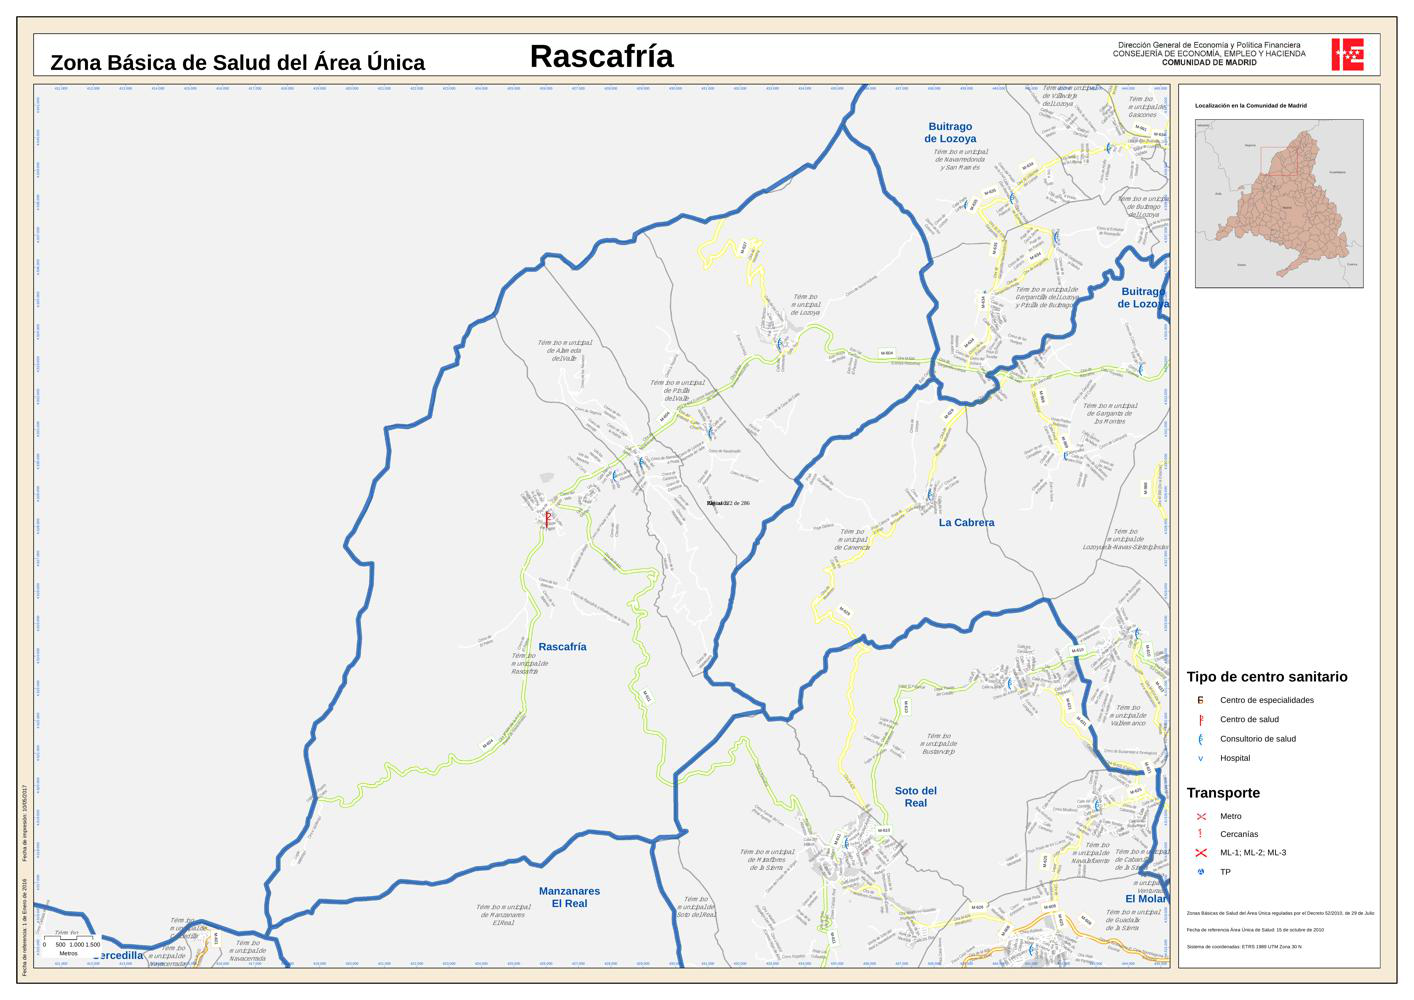

In [94]:
Image.open('./maps/222_rascafria.jpg')

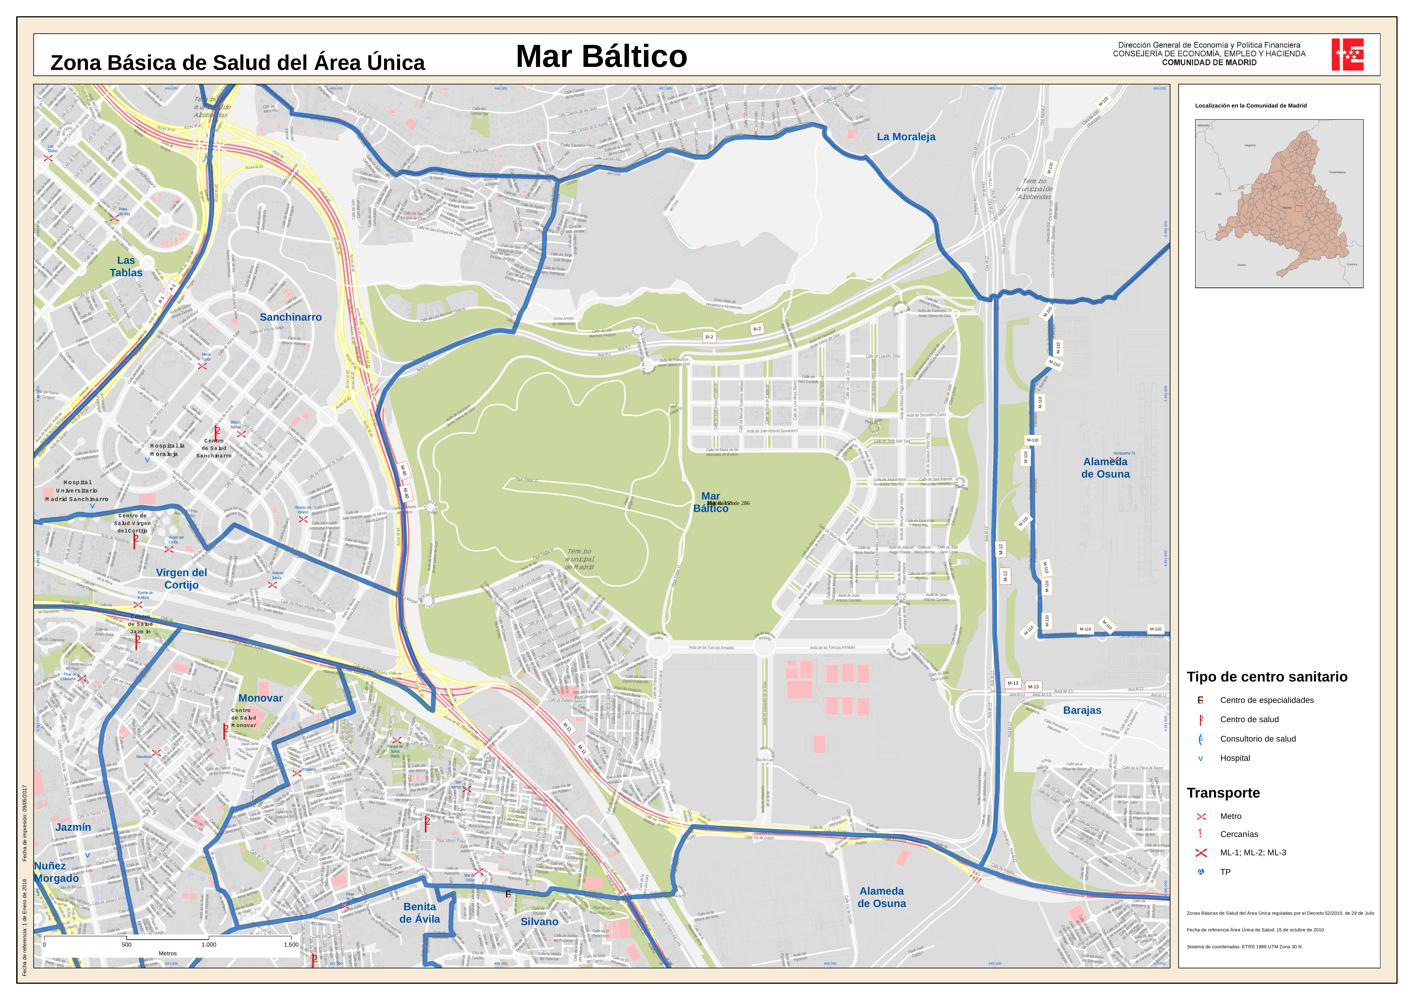

In [95]:
Image.open('./maps/159_mar_baltico.jpg')

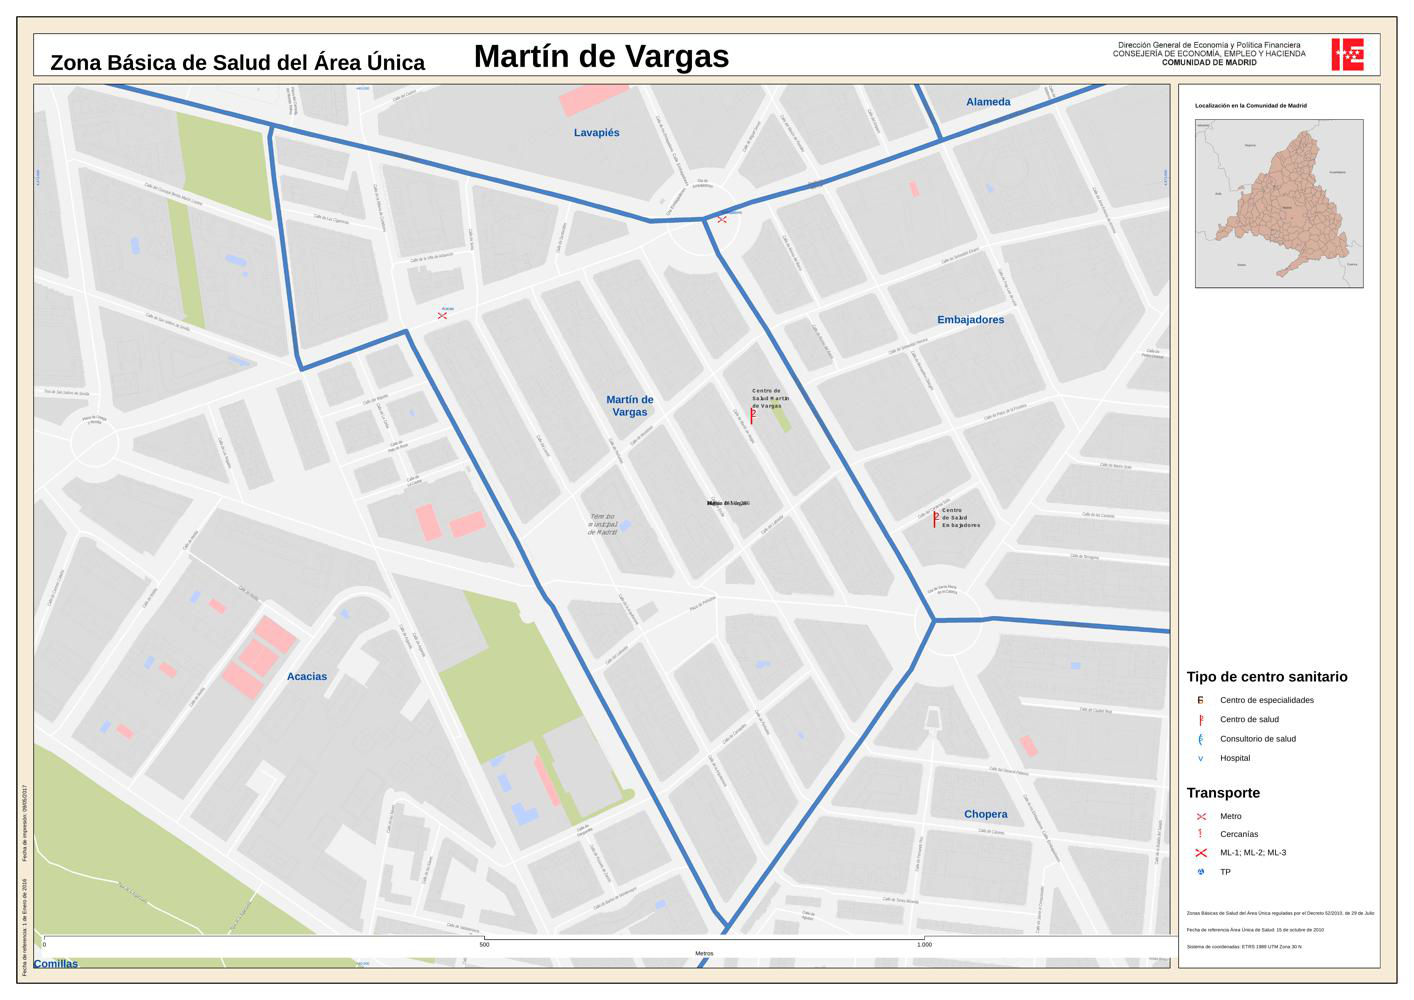

In [96]:
Image.open('./maps/161_martin_de_vargas.jpg')